### Master Thesis - ISCTE - Masters in Data Science
#### How to improve Intrusion Detection Systems - Combining Imbalanced Learning with Anomaly Detection Algorithms
##### Tiago Manuel Alves - Student 120400

#####  PART 1 OF 3

Placeholder for introduction and motivation

# Import Libraries

In [1]:
# =============================================================================
# MASTERS IN DATA SCIENCE - ISCTE
# STUDENT - Tiago Manuel Alves | 120400
# BASELINE DEFINITION WITH EDA
# Dataset: HIKARI-2022 Network Traffic Dataset (Source: https://zenodo.org/records/6463389 - Version 1.4 - HIKARI2022 ALLFLOW)
# Purpose: Baseline and Evaluation of Machine Learning and Deep Learning Models
# PART 1 OF 3
# =============================================================================

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# Set styling for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

print("ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("80:20 Train-Test Split")
print("="*70)

print("LIBRARY VERSIONING")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("torch:", torch.__version__)
print("="*70)


ALL LIBRARIES IMPORTED SUCCESSFULLY!
80:20 Train-Test Split
LIBRARY VERSIONING
pandas: 2.2.3
numpy: 1.26.4
seaborn: 0.13.2
torch: 2.5.1+cu121


# Section 1: Load the Dataset

The goal of this step is to load the dataset and understand its structure. After Running the cells below we will be able to find:
- The structure of the dataset
- The shape of the dataset (how many rows and columns)
- A quick overview of the dataset
- What kind and how many features the dataset has
- Missing values handling

In [2]:
# =============================================================================
# SECTION 1: DATA LOADING AND INITIAL INSPECTION
# =============================================================================

def load_and_inspect_data(filepath):
    """
    Load the dataset and provide comprehensive inspection
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pd.DataFrame: Loaded dataset
    """
    print("STEP 1: LOADING AND INSPECTING DATA")
    print("="*50)
    
    # Load the data
    df = pd.read_csv(filepath)
    
    print(f"Dataset loaded successfully!")
    print(f"Original dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Display basic info
    print("\nDATASET OVERVIEW:")
    print("-" * 30)
    print(df.info())
    
    # Display first few rows
    print("\nFIRST 5 ROWS:")
    print("-" * 20)
    print(df.head())
    
    # Check for missing values
    print("\nMISSING VALUES CHECK:")
    print("-" * 25)
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"Found {missing_values.sum()} missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found!")
    
    # Check data types
    print("\nDATA TYPES:")
    print("-" * 15)
    print(df.dtypes.value_counts())
    
    return df

# ==========================================================
# EXECUTION
# ==========================================================

# Load the dataset
df = load_and_inspect_data('ALLFLOWMETER_HIKARI2022.csv')


STEP 1: LOADING AND INSPECTING DATA
Dataset loaded successfully!
Original dataset shape: (228253, 88)
Columns: ['Unnamed: 0', 'uid', 'originh', 'originp', 'responh', 'responp', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 

# Section 2: Dataset Visualization

The goal of this section is to create a comprehensive visualizations for the dataset overview made in section 1



STEP 2: DATASET VISUALIZATION OVERVIEW


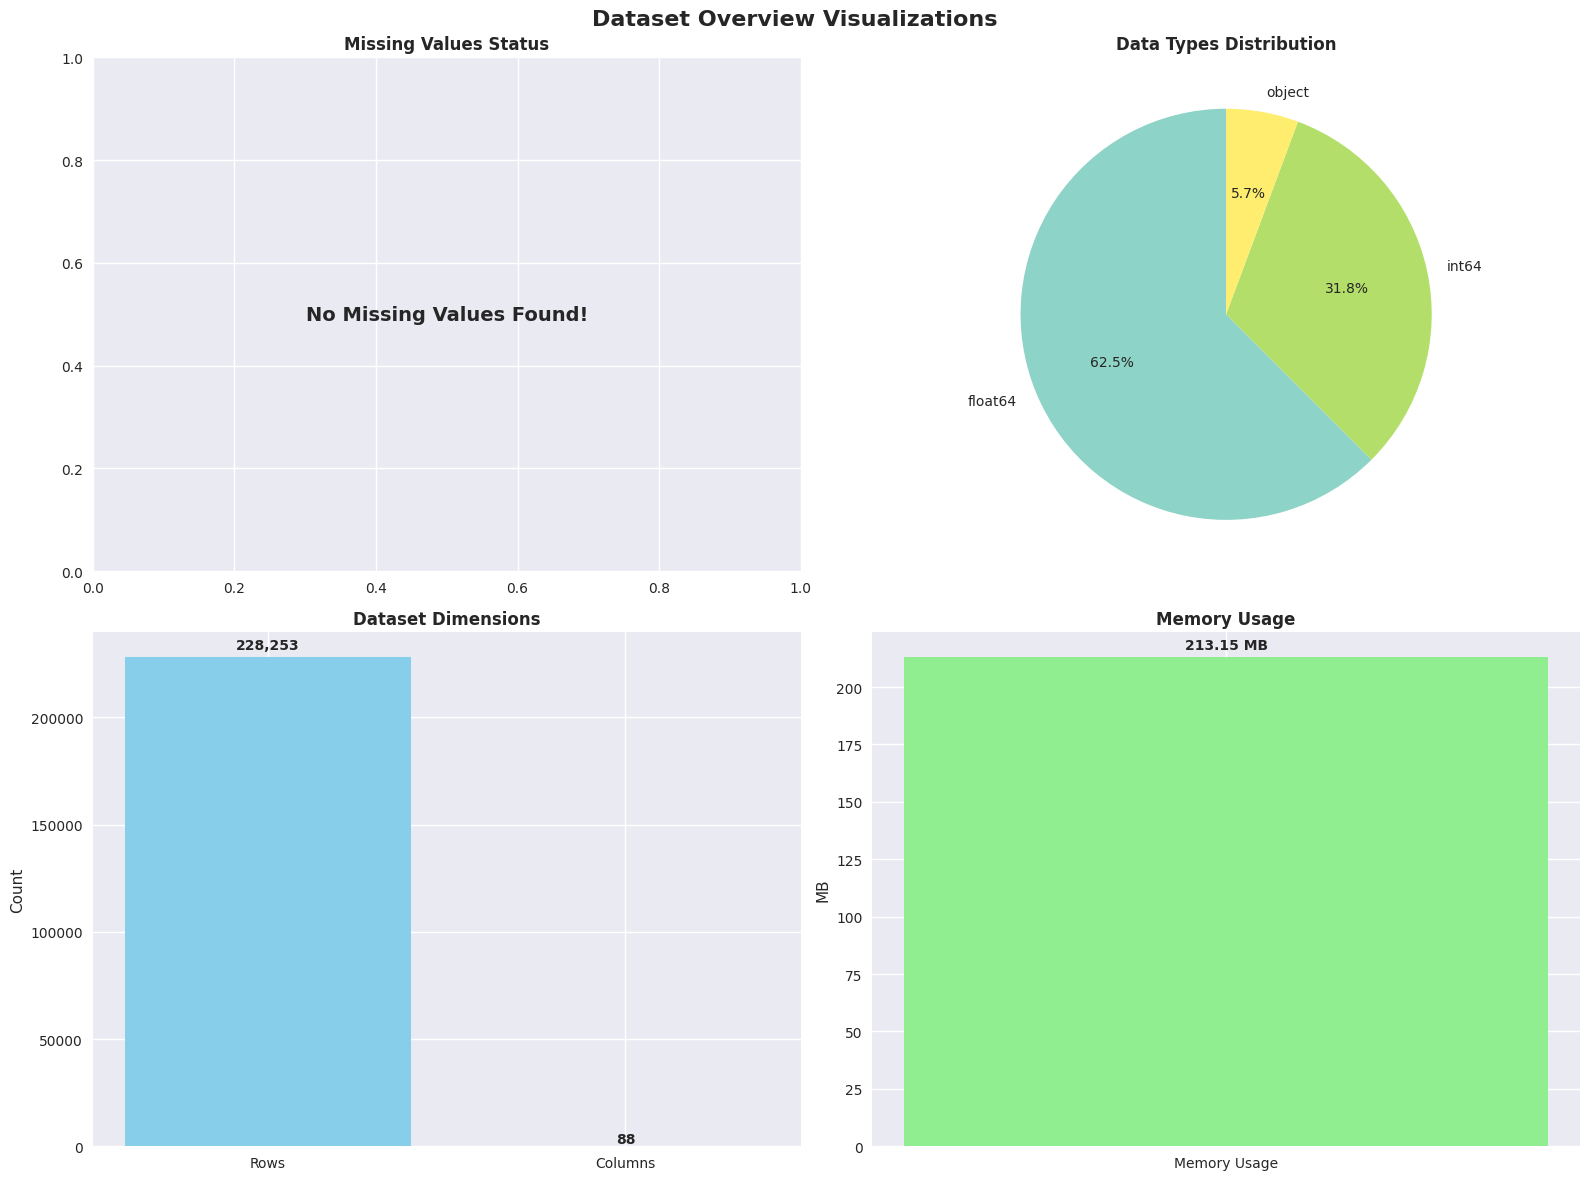

In [3]:
# =============================================================================
# SECTION 2: DATASET VISUALIZATION
# =============================================================================

def visualize_dataset_overview(df):
    
    print("\nSTEP 2: DATASET VISUALIZATION OVERVIEW")
    print("="*50)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Dataset Overview Visualizations', fontsize=16, fontweight='bold')
    
    # Missing values heatmap
    ax1 = axes[0, 0]
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        sns.heatmap(df.isnull(), cbar=True, ax=ax1, cmap='viridis')
        ax1.set_title('Missing Values Heatmap', fontweight='bold')
    else:
        ax1.text(0.5, 0.5, 'No Missing Values Found!', 
                horizontalalignment='center', verticalalignment='center', 
                transform=ax1.transAxes, fontsize=14, fontweight='bold')
        ax1.set_title('Missing Values Status', fontweight='bold')
    
    # Data types distribution
    ax2 = axes[0, 1]
    dtype_counts = df.dtypes.value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(dtype_counts)))
    wedges, texts, autotexts = ax2.pie(dtype_counts.values, labels=dtype_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Data Types Distribution', fontweight='bold')
    
    # Dataset shape info
    ax3 = axes[1, 0]
    shape_data = ['Rows', 'Columns']
    shape_values = [df.shape[0], df.shape[1]]
    bars = ax3.bar(shape_data, shape_values, color=['skyblue', 'lightcoral'])
    ax3.set_title('Dataset Dimensions', fontweight='bold')
    ax3.set_ylabel('Count')
    
    # Add value labels on bars
    for bar, value in zip(bars, shape_values):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')
    
    # Memory usage
    ax4 = axes[1, 1]
    memory_mb = df.memory_usage(deep=True).sum() / 1024**2
    ax4.bar(['Memory Usage'], [memory_mb], color='lightgreen')
    ax4.set_title('Memory Usage', fontweight='bold')
    ax4.set_ylabel('MB')
    ax4.text(0, memory_mb + memory_mb*0.01, f'{memory_mb:.2f} MB',
            ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
# ==========================================================
# EXECUTION
# ==========================================================    

# Visualize dataset overview
visualize_dataset_overview(df)


# Section 3 - Data Cleaning and Processing

## Goal
- Remove missing values
- Remove categorical columns
- Summarize actions

In [4]:
# =============================================================================
# SECTION 3: DATA CLEANING AND PROCESSING
# =============================================================================

def clean_and_preprocess_data(df):

    print("\nSTEP 3: DATA CLEANING AND PREPROCESSING")
    print("="*50)
    
    # Store original shape for comparison
    original_shape = df.shape
    print(f"Original dataset shape: {original_shape}")
    
    # Drop missing values
    print("\nRemoving missing values (if any)...")
    df_cleaned = df.dropna(axis=0)
    after_dropna_shape = df_cleaned.shape
    rows_removed = original_shape[0] - after_dropna_shape[0]
    print(f"Shape after removing NaN: {after_dropna_shape}")
    print(f"Rows removed: {rows_removed:,}")
    
    # Drop specified columns
    columns_to_drop = ['Unnamed: 0', 'uid', 'originh', 'responh', 'flow_duration', 'attack_category']
    print(f"\nRemoving columns: {columns_to_drop}")
    
    # Check which columns actually exist before dropping
    existing_columns = [col for col in columns_to_drop if col in df_cleaned.columns]
    missing_columns = [col for col in columns_to_drop if col not in df_cleaned.columns]
    
    if existing_columns:
        df_cleaned = df_cleaned.drop(existing_columns, axis=1)
        print(f"Successfully dropped: {existing_columns}")
    
    if missing_columns:
        print(f"Columns not found (skipped): {missing_columns}")
    
    final_shape = df_cleaned.shape
    print(f"Final dataset shape: {final_shape}")
    print(f"Total data reduction: {((original_shape[0] - final_shape[0]) / original_shape[0] * 100):.2f}% rows")
    print(f"Total columns reduction: {((original_shape[1] - final_shape[1]) / original_shape[1] * 100):.2f}% columns")
    
    return df_cleaned

# Clean and preprocess the data
df = clean_and_preprocess_data(df)



STEP 3: DATA CLEANING AND PREPROCESSING
Original dataset shape: (228253, 88)

Removing missing values (if any)...
Shape after removing NaN: (228253, 88)
Rows removed: 0

Removing columns: ['Unnamed: 0', 'uid', 'originh', 'responh', 'flow_duration', 'attack_category']
Successfully dropped: ['Unnamed: 0', 'uid', 'originh', 'responh', 'flow_duration', 'attack_category']
Final dataset shape: (228253, 82)
Total data reduction: 0.00% rows
Total columns reduction: 6.82% columns


# Section 4 - Label Analysis

## Goal
- Get a dataset overview using the "Label" feature, which will be the one used for this analysis


STEP 4: TARGET VARIABLE ANALYSIS
LABEL DISTRIBUTION:
-------------------------
   0: 214,904 samples (94.15%)
   1: 13,349 samples (5.85%)


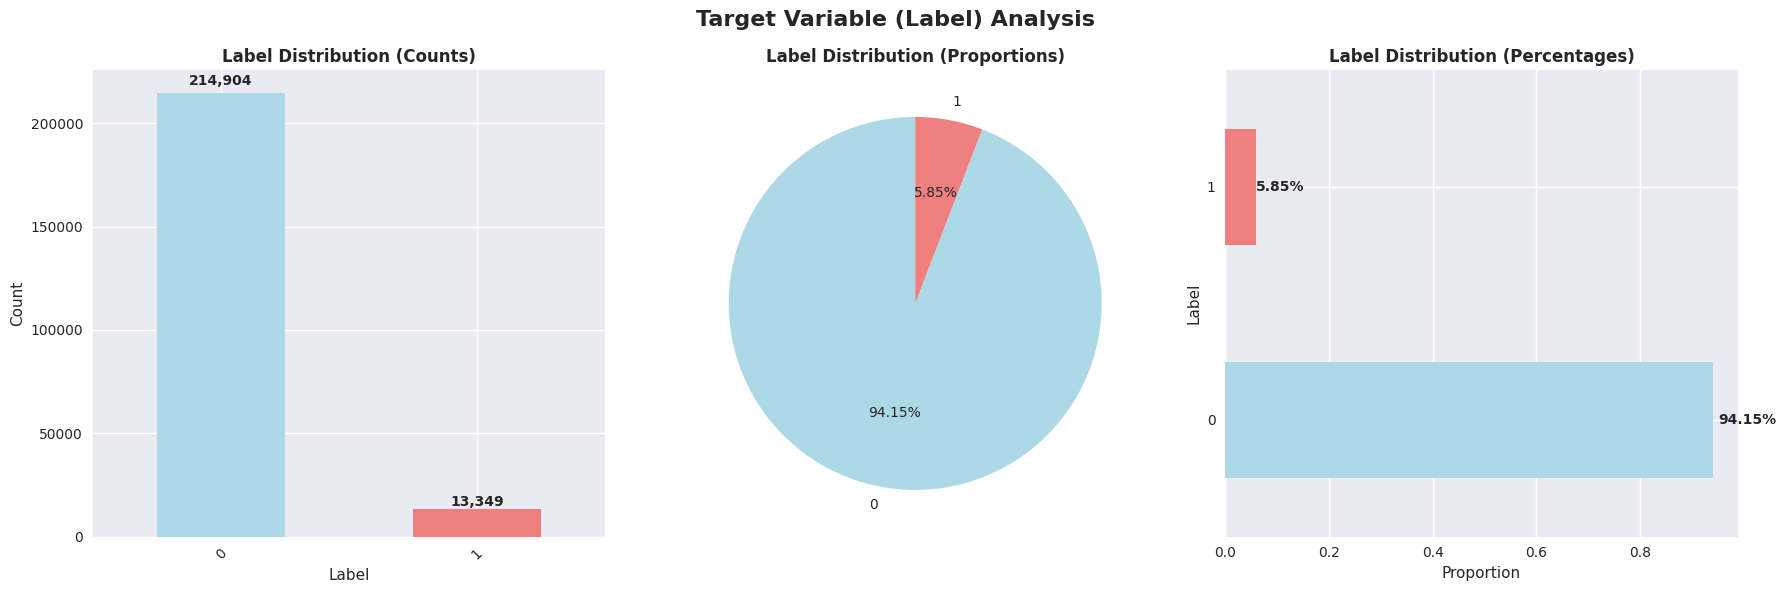

In [5]:
# =============================================================================
# SECTION 4: LABEL ANALYSIS
# =============================================================================

def analyze_target_variable(df):

    print("\nSTEP 4: TARGET VARIABLE ANALYSIS")
    print("="*50)
    
    if 'Label' not in df.columns:
        print("Label column not found!")
        return
    
    # Get label distribution
    label_counts = df['Label'].value_counts()
    label_proportions = df['Label'].value_counts(normalize=True)
    
    print("LABEL DISTRIBUTION:")
    print("-" * 25)
    for label, count in label_counts.items():
        percentage = label_proportions[label] * 100
        print(f"   {label}: {count:,} samples ({percentage:.2f}%)")
    
    # Visualize target distribution
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Target Variable (Label) Analysis', fontsize=16, fontweight='bold')
    
    # Count plot
    ax1 = axes[0]
    label_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
    ax1.set_title('Label Distribution (Counts)', fontweight='bold')
    ax1.set_xlabel('Label')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(label_counts.values):
        ax1.text(i, v + v*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    ax2 = axes[1]
    colors = ['lightblue', 'lightcoral']
    wedges, texts, autotexts = ax2.pie(label_counts.values, labels=label_counts.index, 
                                      autopct='%1.2f%%', colors=colors, startangle=90)
    ax2.set_title('Label Distribution (Proportions)', fontweight='bold')
    
    # Horizontal bar chart
    ax3 = axes[2]
    label_proportions.plot(kind='barh', ax=ax3, color=['lightblue', 'lightcoral'])
    ax3.set_title('Label Distribution (Percentages)', fontweight='bold')
    ax3.set_xlabel('Proportion')
    ax3.set_ylabel('Label')
    
    # Add percentage labels
    for i, v in enumerate(label_proportions.values):
        ax3.text(v + v*0.01, i, f'{v*100:.2f}%', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# ==========================================================
# EXECUTION
# ==========================================================

# Analyze target variable
analyze_target_variable(df)


# Section 5 - Features preparation for dataset modeling

## Goal
- Define features and target for modeling
    - in this scenario we will set (X) as feature and (y) as target
    - drop "Label"
    

In [6]:
# =============================================================================
# SECTION 5: PREPARE FEATURES FOR DATASET MODELING
# # =============================================================================

def prepare_features_and_target(df):

    print("\nSTEP 5: PREPARING FEATURES AND TARGET")
    print("="*50)
    
    # Separate features and target
    if 'Label' not in df.columns:
        raise ValueError("Label column not found in dataset!")
    
    X = df.drop(columns=['Label'])
    y = df['Label'].values
    feature_names = list(X.columns)
    
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")
    print(f"Number of features: {len(feature_names)}")
    print(f"Feature names: {feature_names[:10]}..." if len(feature_names) > 10 else f"📋 Feature names: {feature_names}")
    
    # Display feature statistics
    print("\nFEATURE STATISTICS:")
    print("-" * 25)
    print(X.describe())
    
    return X, y, feature_names

# ==========================================================
# EXECUTION
# ==========================================================

# Prepare features and target
X, y, feature_names = prepare_features_and_target(df)



STEP 5: PREPARING FEATURES AND TARGET
Features (X) shape: (228253, 81)
Target (y) shape: (228253,)
Number of features: 81
Feature names: ['originp', 'responp', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio']...

FEATURE STATISTICS:
-------------------------
             originp        responp   fwd_pkts_tot   bwd_pkts_tot  \
count  228253.000000  228253.000000  228253.000000  228253.000000   
mean    36835.267633    7572.013108       7.544996       6.224299   
std     17707.592755   15979.443219      20.630049      16.224580   
min        68.000000       0.000000       0.000000       0.000000   
25%     23638.000000     443.000000       1.000000       1.000000   
50%     40172.000000     443.000000       6.000000       5.000000   
75%     50846.000000    3306.000000      12.000000      11.000000   
max     65534.000000   65000.000000    3214.000000    2357.000000   

       fwd_data

# Section 6 - Dataset Split

## Goal
- Split dataset on a ratio of 80:20
    - 80% for Training and 20% for Testing
- Have a visual analysis of the the split


STEP 6: DATA SPLITTING
Train-Test Split Configuration:
   Train size: 80%
   Test size: 20%
   Random state: 42

SPLIT RESULTS:
   X_train shape: (182602, 81)
   y_train shape: (182602,)
   X_test shape: (45651, 81)
   y_test shape: (45651,)


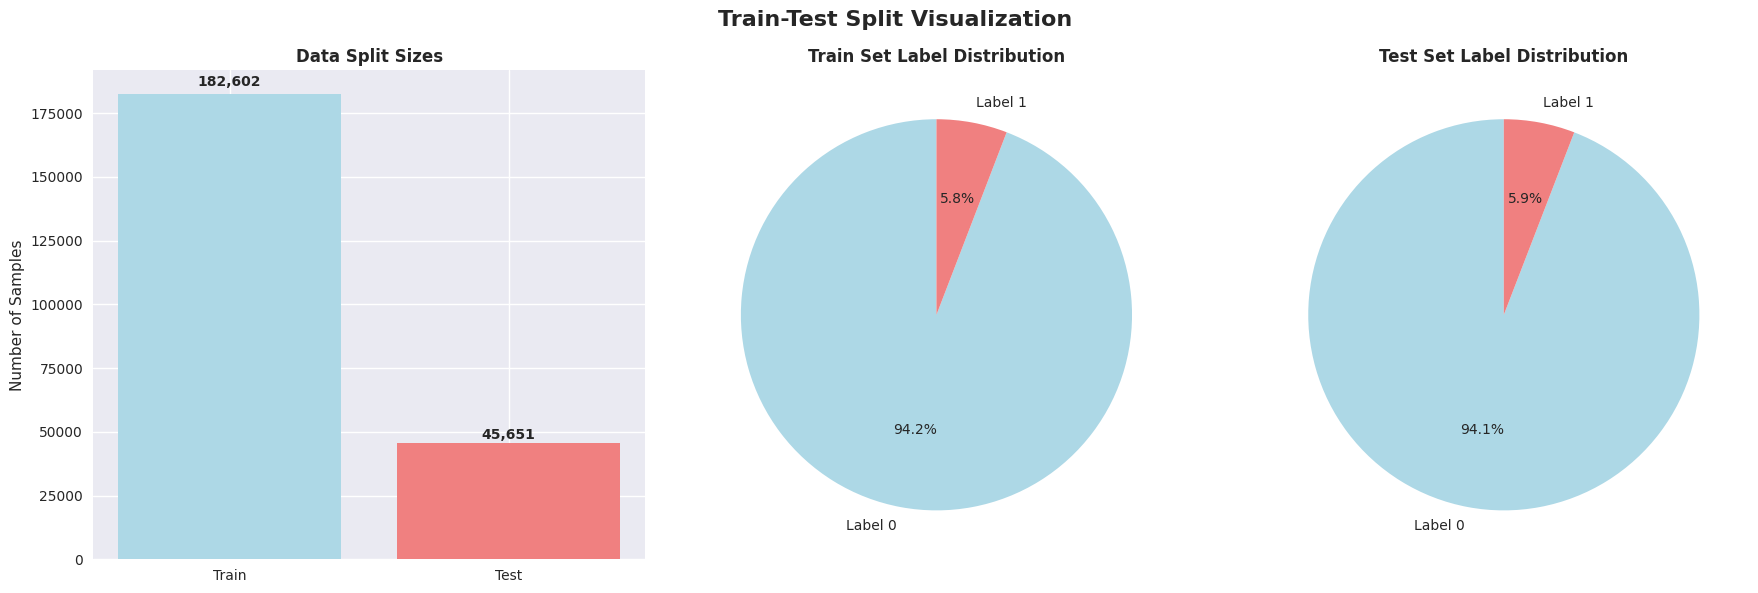


LABEL DISTRIBUTIONS:
   Train set:
      Label 0: 171,930 (94.16%)
      Label 1: 10,672 (5.84%)
   Test set:
      Label 0: 42,974 (94.14%)
      Label 1: 2,677 (5.86%)


In [7]:
# =============================================================================
# SECTION 6: DATASET SPLIT
# =============================================================================

def split_data_and_visualize(X, y, test_size=0.2, visualize= True, random_state=RANDOM_SEED):

    print("\nSTEP 6: DATA SPLITTING")
    print("="*50)
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_SEED)
    
    print(f"Train-Test Split Configuration:")
    print(f"   Train size: {(1-test_size)*100:.0f}%")
    print(f"   Test size: {test_size*100:.0f}%")
    print(f"   Random state: {random_state}")
    
    print(f"\nSPLIT RESULTS:")
    print(f"   X_train shape: {X_train.shape}")
    print(f"   y_train shape: {y_train.shape}")
    print(f"   X_test shape: {X_test.shape}")
    print(f"   y_test shape: {y_test.shape}")
    
    # Visualize the split
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Train-Test Split Visualization', fontsize=16, fontweight='bold')
    
    # Split proportions
    ax1 = axes[0]
    split_data = ['Train', 'Test']
    split_counts = [len(X_train), len(X_test)]
    colors = ['lightblue', 'lightcoral']
    bars = ax1.bar(split_data, split_counts, color=colors)
    ax1.set_title('Data Split Sizes', fontweight='bold')
    ax1.set_ylabel('Number of Samples')
    
    # Add value labels
    for bar, count in zip(bars, split_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # Label distribution in train set
    ax2 = axes[1]
    train_labels, train_counts = np.unique(y_train, return_counts=True)
    ax2.pie(train_counts, labels=[f'Label {label}' for label in train_labels], 
           autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Train Set Label Distribution', fontweight='bold')
    
    # Label distribution in test set
    ax3 = axes[2]
    test_labels, test_counts = np.unique(y_test, return_counts=True)
    ax3.pie(test_counts, labels=[f'Label {label}' for label in test_labels], 
           autopct='%1.1f%%', colors=colors, startangle=90)
    ax3.set_title('Test Set Label Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print label distributions
    print(f"\nLABEL DISTRIBUTIONS:")
    print(f"   Train set:")
    for label, count in zip(train_labels, train_counts):
        print(f"      Label {label}: {count:,} ({count/len(y_train)*100:.2f}%)")
    
    print(f"   Test set:")
    for label, count in zip(test_labels, test_counts):
        print(f"      Label {label}: {count:,} ({count/len(y_test)*100:.2f}%)")
    
    
    
    return X_train, X_test, y_train, y_test

# ==========================================================
# EXECUTION
# ==========================================================

# Split the data
X_train, X_test, y_train, y_test = split_data_and_visualize(X, y)


# Section 7 - Deep Neural Network - Implementation

## Goal
- Create Deep Neural Network using PyTorch
    - Parameters definition
    - Training
    - Training Summary
    - Predictions

In [8]:
# =============================================================================
# SECTION 7: PYTORCH DEEP NEURAL NETWORK IMPLEMENTATION
# =============================================================================


def create_pytorch_neural_network(input_dim, output_dim, hidden_dims=[128, 64, 32], dropout=0.3):

    print("STEP 7: DEEP NEURAL NETWORK ARCHITECTURE DESIGN:")
    print("-" * 40)
    print(f"   Input dimension: {input_dim}")
    print(f"   Hidden layers: {len(hidden_dims)}")
    print(f"   Hidden dimensions: {hidden_dims}")
    print(f"   Output dimension: {output_dim}")
    print(f"   Dropout rate: {dropout}")
    print(f"   Activation function: ReLU")
    
    layers = []
    prev_dim = input_dim
    
    # Build hidden layers
    for i, hidden_dim in enumerate(hidden_dims):
        layers.append(nn.Linear(prev_dim, hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout))
        prev_dim = hidden_dim
        print(f"   Hidden Layer {i+1}: {prev_dim} -> {hidden_dim} (ReLU + Dropout)")
    
    # Output layer
    layers.append(nn.Linear(prev_dim, output_dim))
    print(f"   Output Layer: {prev_dim} -> {output_dim} (Linear)")
    
    model = nn.Sequential(*layers)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    print(f"\nNETWORK STATISTICS:")
    print(f"   Total parameters: {total_params:,}")
    print(f"   Trainable parameters: {trainable_params:,}")
    print(f"   Network depth: {len([l for l in layers if isinstance(l, nn.Linear)])} layers")
    
    return model


def train_pytorch_neural_network(X_train, y_train, hidden_dims=[128, 64, 32], dropout=0.3, 
                                learning_rate=0.001, epochs=500, batch_size=256, 
                                random_state=RANDOM_SEED, verbose=True, early_stopping_patience=10):

    print("\n STEP 7.1: TRAINING PYTORCH NEURAL NETWORK")
    print("="*50)
    
    if X_train is None or y_train is None:
        print("Training data not available!")
        return None
    
    # Set random seeds for reproducibility
    torch.manual_seed(random_state)
    np.random.seed(random_state)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_state)
        torch.cuda.manual_seed_all(random_state)
    
    # Device setup
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"TRAINING CONFIGURATION:")
    print(f"   Device: {device}")
    print(f"   Hidden dimensions: {hidden_dims}")
    print(f"   Dropout rate: {dropout}")
    print(f"   Learning rate: {learning_rate}")
    print(f"   Epochs: {epochs}")
    print(f"   Batch size: {batch_size}")
    print(f"   Random seed: {random_state}")
    print(f"   Early stopping patience: {early_stopping_patience}")
    
    # Prepare data
    print(f"\nDATA PREPARATION:")
    print(f"   Input shape: {X_train.shape}")
    print(f"   Target shape: {y_train.shape}")
    
    # Convert data to tensors
    X_tensor = torch.FloatTensor(X_train.values if hasattr(X_train, 'values') else X_train).to(device)
    
    # Handle target encoding
    unique_classes = np.unique(y_train)
    y_encoded = np.array([np.where(unique_classes == label)[0][0] for label in y_train])
    y_tensor = torch.LongTensor(y_encoded).to(device)
    
    print(f"   Unique classes: {unique_classes}")
    print(f"   Encoded target range: [{y_encoded.min()}, {y_encoded.max()}]")
    print(f"   Tensor shapes: X={X_tensor.shape}, y={y_tensor.shape}")
    
    # Create model
    input_dim = X_tensor.shape[1]
    output_dim = len(unique_classes)
    model = create_pytorch_neural_network(input_dim, output_dim, hidden_dims, dropout).to(device)
    
    # Setup training components
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Create data loader
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    print(f"   Number of batches per epoch: {len(dataloader)}")
    
    # Training loop with comprehensive monitoring
    print(f"\n STEP 7.2: STARTING NEURAL NETWORK TRAINING:")
    print("-" * 50)
    
    training_history = {
        'losses': [],
        'epoch_times': [],
        'batch_losses': []
    }
    
    model.train()
    import time
    
    best_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(epochs):
        epoch_start_time = time.time()
        total_loss = 0.0
        batch_losses = []
        
        for batch_idx, (batch_X, batch_y) in enumerate(dataloader):
            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            batch_loss = loss.item()
            total_loss += batch_loss
            batch_losses.append(batch_loss)
        
        # Calculate epoch metrics
        avg_epoch_loss = total_loss / len(dataloader)
        epoch_time = time.time() - epoch_start_time
        
        # Store training history
        training_history['losses'].append(avg_epoch_loss)
        training_history['epoch_times'].append(epoch_time)
        training_history['batch_losses'].extend(batch_losses)
        
        # Print progress
        if verbose and (epoch + 1) % 20 == 0:
            print(f"   Epoch {epoch+1:3d}/{epochs} | Loss: {avg_epoch_loss:.6f} | Time: {epoch_time:.2f}s")
        
        # Early stopping check
        if avg_epoch_loss < best_loss:
            best_loss = avg_epoch_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= early_stopping_patience:
            print(f"   Early stopping triggered at epoch {epoch+1} due to no improvement in loss.")
            break
        
    # Training summary
    total_training_time = sum(training_history['epoch_times'])
    final_loss = training_history['losses'][-1]
    initial_loss = training_history['losses'][0]
    loss_improvement = ((initial_loss - final_loss) / initial_loss) * 100
    
    print(f"\nTRAINING SUMMARY:")
    print(f"   Total training time: {total_training_time:.2f} seconds")
    print(f"   Average time per epoch: {total_training_time/len(training_history['losses']):.2f} seconds")
    print(f"   Initial loss: {initial_loss:.6f}")
    print(f"   Final loss: {final_loss:.6f}")
    print(f"   Loss improvement: {loss_improvement:.2f}%")
    print(f"   Epochs completed: {len(training_history['losses'])}")
    
    # Create model dictionary
    model_dict = {
        'model': model,
        'classes': unique_classes,
        'device': device,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'training_history': training_history,
        'config': {
            'hidden_dims': hidden_dims,
            'dropout': dropout,
            'learning_rate': learning_rate,
            'epochs': epochs,
            'batch_size': batch_size
        }
    }
    
    return model_dict


def pytorch_predict(model_dict, X_test):

    if model_dict is None:
        return None
    
    model = model_dict['model']
    classes = model_dict['classes']
    device = model_dict['device']
    
    model.eval()
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test).to(device)
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels = [classes[pred.item()] for pred in predicted]
    
    return np.array(predicted_labels)


def pytorch_predict_proba(model_dict, X_test):

    if model_dict is None:
        return None
    
    model = model_dict['model']
    device = model_dict['device']
    
    model.eval()
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test).to(device)
        outputs = model(X_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        return probabilities.cpu().numpy()


def visualize_training_history(model_dict):

    if model_dict is None or 'training_history' not in model_dict:
        return
    
    print("\n STEP 7.3: VISUALIZING NEURAL NETWORK TRAINING HISTORY")
    print("="*50)
    
    training_history = model_dict['training_history']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('PyTorch Neural Network Training History', fontsize=16, fontweight='bold')
    
    # Training Loss
    ax1 = axes[0]
    epochs_range = range(1, len(training_history['losses']) + 1)
    ax1.plot(epochs_range, training_history['losses'], 'b-', linewidth=2, label='Training Loss')
    ax1.set_title('Training Loss Over Epochs', fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Epoch Training Times
    ax2 = axes[1]
    ax2.plot(epochs_range, training_history['epoch_times'], 'g-', linewidth=2, label='Epoch Time')
    ax2.set_title('Training Time per Epoch', fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Time (seconds)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Loss Distribution (histogram)
    ax3 = axes[2]
    ax3.hist(training_history['losses'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    ax3.set_title('Loss Distribution', fontweight='bold')
    ax3.set_xlabel('Loss Value')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# Section 8 - Model Trainings

## Goal
- Train Machine Learning and Deep Learning Models
    - Machine Learning
        - Random Forest
        - Gradient Boosting
        - Logistic Regression
        - Naive Bayes
    - Deep Learning
        - Deep Neural Network - Using PyTorch


STEP 7: DEEP LEARNING MODEL TRAINING

 STEP 7.1: TRAINING PYTORCH NEURAL NETWORK
TRAINING CONFIGURATION:
   Device: cuda
   Hidden dimensions: [128, 64, 32]
   Dropout rate: 0.3
   Learning rate: 0.001
   Epochs: 500
   Batch size: 256
   Random seed: 42
   Early stopping patience: 10

DATA PREPARATION:
   Input shape: (182602, 81)
   Target shape: (182602,)
   Unique classes: [0 1]
   Encoded target range: [0, 1]
   Tensor shapes: X=torch.Size([182602, 81]), y=torch.Size([182602])
STEP 7: DEEP NEURAL NETWORK ARCHITECTURE DESIGN:
----------------------------------------
   Input dimension: 81
   Hidden layers: 3
   Hidden dimensions: [128, 64, 32]
   Output dimension: 2
   Dropout rate: 0.3
   Activation function: ReLU
   Hidden Layer 1: 128 -> 128 (ReLU + Dropout)
   Hidden Layer 2: 64 -> 64 (ReLU + Dropout)
   Hidden Layer 3: 32 -> 32 (ReLU + Dropout)
   Output Layer: 32 -> 2 (Linear)

NETWORK STATISTICS:
   Total parameters: 20,898
   Trainable parameters: 20,898
   Network depth: 

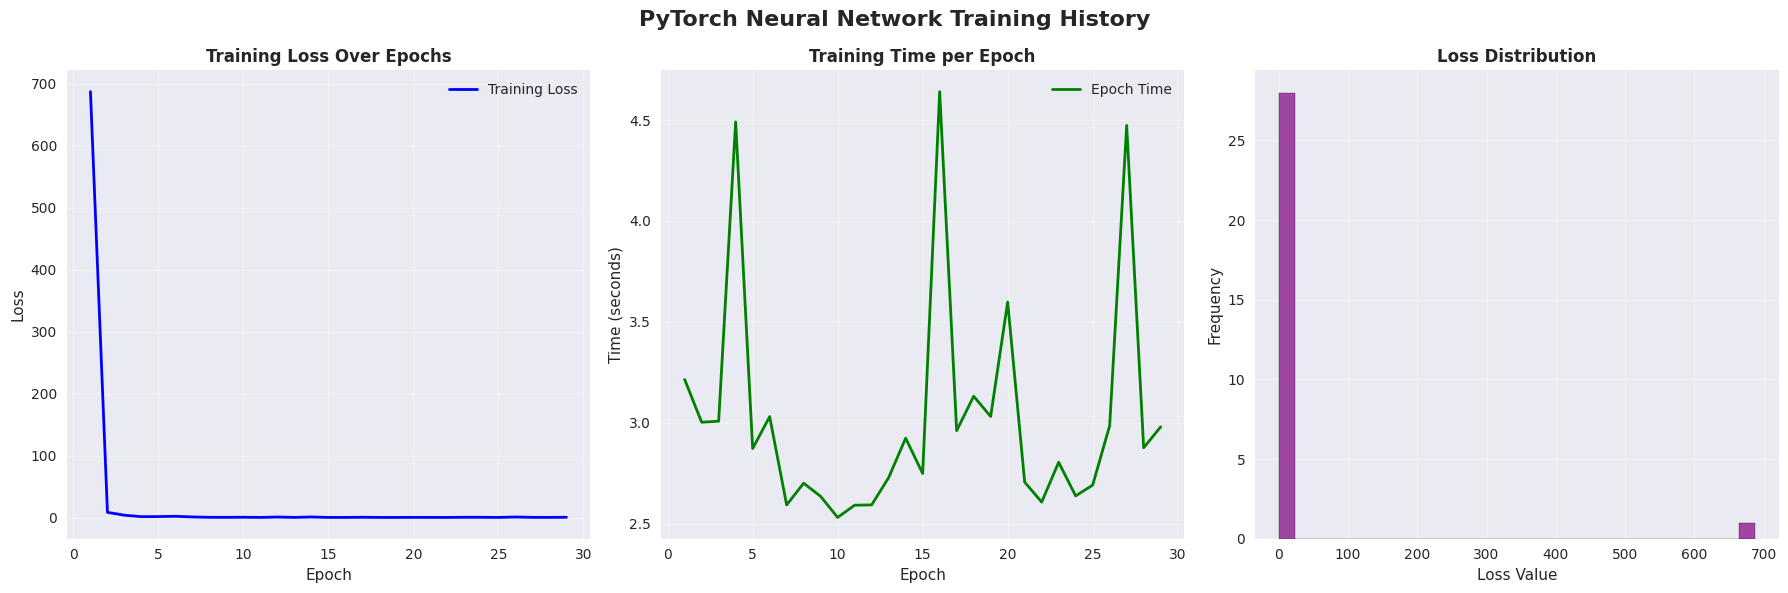


STEP 8: MACHINE LEARNING MODEL TRAINING

 STEP 8.1: TRAINING RANDOM FOREST

Starting Random Forest training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


Random Forest training completed!

 STEP 8.2: TRAINING GRADIENT BOOSTING

Starting Gradient Boosting training...
      Iter       Train Loss   Remaining Time 
         1           0.2999            2.24m
         2           0.2589            2.23m
         3           0.2297            2.18m
         4           0.2072            2.16m
         5           0.1891            2.16m
         6           0.1735            2.14m
         7           0.1600            2.11m
         8           0.1489            2.14m
         9           0.1377            2.17m
        10           0.1283            2.17m
        20           0.0785            1.98m
        30           0.0613            1.70m
        40           0.0535            1.52m
        50           0.0493            1.27m
        60           0.0473            1.04m
        70           0.0462           46.34s
        80           0.0458           31.08s
        90           0.0454           15.44s
       100           0.0452    

In [9]:
def train_random_forest(X_train, y_train):
    """
    Train Random Forest classifier with verbose output
    
    Parameters:
    X_train: Training features
    y_train: Training target
    
    Returns:
    RandomForestClassifier: Trained model
    """
    print("\n STEP 8.1: TRAINING RANDOM FOREST")
    print("="*40)
    
    rf = RandomForestClassifier(
        random_state=RANDOM_SEED,
        n_jobs=-1,
        verbose=1
    )
    
    print("\nStarting Random Forest training...")
    rf.fit(X_train, y_train)
    print("Random Forest training completed!")
    
    return rf

def train_gradient_boosting(X_train, y_train):
    """
    Train Gradient Boosting classifier with verbose output
    
    Parameters:
    X_train: Training features
    y_train: Training target
    
    Returns:
    GradientBoostingClassifier: Trained model
    """
    print("\n STEP 8.2: TRAINING GRADIENT BOOSTING")
    print("="*40)
    
    
    gb = GradientBoostingClassifier(
        random_state=RANDOM_SEED,
        verbose=1
    )
    
    print("\nStarting Gradient Boosting training...")
    gb.fit(X_train, y_train)
    print("Gradient Boosting training completed!")
    
    return gb

def train_logistic_regression(X_train, y_train):
    """
    Train Logistic Regression classifier with verbose output
    
    Parameters:
    X_train: Training features
    y_train: Training target
    
    Returns:
    LogisticRegression: Trained model
    """
    print("\n STEP 8.3: TRAINING LOGISTIC REGRESSION")
    print("="*40)
    
    lr = LogisticRegression(
        random_state=RANDOM_SEED
    )
    
    print("\nStarting Logistic Regression training...")
    lr.fit(X_train, y_train)
    print("Logistic Regression training completed!")
    
    return lr

def train_naive_bayes(X_train, y_train):
    """
    Train Naive Bayes classifier with verbose output
    
    Parameters:
    X_train: Training features
    y_train: Training target
    
    Returns:
    GaussianNB: Trained model
    """
    print("\n STEP 8.4: TRAINING NAIVE BAYES")
    print("="*40)
    
    print("Model Configuration:")
    print("   Default Gaussian Naive Bayes parameters")
    
    nb = GaussianNB()
    
    print("\nStarting Naive Bayes training...")
    nb.fit(X_train, y_train)
    print("Naive Bayes training completed!")
    
    return nb

# Train all models
print("\nSTEP 7: DEEP LEARNING MODEL TRAINING")
print("="*60)

# Train PyTorch Neural Network
if 'X_train' in locals() and X_train is not None:
    try:
        pytorch_model_dict = train_pytorch_neural_network(X_train, y_train)
        if pytorch_model_dict is not None:
            print("Deep Neural Network training successful!")
            # Visualize training history
            visualize_training_history(pytorch_model_dict)
        else:
            print("Deep Neural Network training failed!")
    except Exception as e:
        print(f"Error training Deep Neural Network: {str(e)}")
        pytorch_model_dict = None

print("\nSTEP 8: MACHINE LEARNING MODEL TRAINING")
print("="*60)
# Train traditional ML models
rf = train_random_forest(X_train, y_train)
gb = train_gradient_boosting(X_train, y_train)
lr = train_logistic_regression(X_train, y_train)
nb = train_naive_bayes(X_train, y_train)




# Section 9 - Predictions

## Goal
- Make Preditions with all models trained in steps 7 and 8

In [10]:
# =============================================================================
# SECTION 9: PREDICTIONS
# =============================================================================

def make_predictions_verbose_with_nn(models_dict, pytorch_model_dict, X_test):

    print("\nSTEP 9: MAKING PREDICTIONS")
    print("="*60)
    
    predictions = {}
    
    # Traditional ML models
    for model_name, model in models_dict.items():
        print(f"\nMaking predictions with {model_name}...")
        pred = model.predict(X_test)
        predictions[model_name] = pred
        
        # Show prediction distribution
        unique, counts = np.unique(pred, return_counts=True)
        print(f"Prediction distribution:")
        for label, count in zip(unique, counts):
            percentage = (count / len(pred)) * 100
            print(f" Label {label}: {count:,} ({percentage:.2f}%)")
    
    # PyTorch Neural Network
    if pytorch_model_dict is not None:
        print(f"\nMaking predictions with Deep Neural Network...")
        nn_pred = pytorch_predict(pytorch_model_dict, X_test)
        if nn_pred is not None:
            predictions["Deep Neural Network"] = nn_pred
            
            # Show prediction distribution
            unique, counts = np.unique(nn_pred, return_counts=True)
            print(f" Prediction distribution:")
            for label, count in zip(unique, counts):
                percentage = (count / len(nn_pred)) * 100
                print(f" Label {label}: {count:,} ({percentage:.2f}%)")
        else:
            print(" Deep Neural Network prediction failed!")
    
    
    return predictions

# Create models dictionary
models_dict = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Logistic Regression": lr,
    "Naive Bayes": nb
}

# ==========================================================
# EXECUTION
# ==========================================================

# Make predictions including Neural Network
predictions = make_predictions_verbose_with_nn(models_dict, pytorch_model_dict, X_test)

# Extract individual predictions for compatibility
rf_pred = predictions.get("Random Forest")
gb_pred = predictions.get("Gradient Boosting")
lr_pred = predictions.get("Logistic Regression")
nb_pred = predictions.get("Naive Bayes")
nn_pred = predictions.get("Deep Neural Network")



STEP 9: MAKING PREDICTIONS

Making predictions with Random Forest...
Prediction distribution:
 Label 0: 42,924 (94.03%)
 Label 1: 2,727 (5.97%)

Making predictions with Gradient Boosting...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Prediction distribution:
 Label 0: 43,613 (95.54%)
 Label 1: 2,038 (4.46%)

Making predictions with Logistic Regression...
Prediction distribution:
 Label 0: 44,818 (98.18%)
 Label 1: 833 (1.82%)

Making predictions with Naive Bayes...
Prediction distribution:
 Label 0: 14,013 (30.70%)
 Label 1: 31,638 (69.30%)

Making predictions with Deep Neural Network...
 Prediction distribution:
 Label 0: 45,651 (100.00%)


# Section 10 - Metrics Calculation

## Goal
- Check performance for each trained model
    - Metrics are:
        - Accuracy
        - Precision
        - Recall
        - F-1 Score
        - AUC-ROC

In [11]:
# =============================================================================
# SECTION 10: METRICS CALCULATION
# =============================================================================

def calculate_all_metrics_with_nn(y_true, predictions_dict):

    print("\nSTEP 10: CALCULATING PERFORMANCE METRICS")
    print("="*60)
    
    metrics = {}
    
    for model_name, y_pred in predictions_dict.items():
        if y_pred is not None:
            print(f"\nCalculating metrics for {model_name}...")
            
            model_metrics = {
                "Accuracy": accuracy_score(y_true, y_pred),
                "Precision": precision_score(y_true, y_pred),
                "Recall": recall_score(y_true, y_pred),
                "F1-Score": f1_score(y_true, y_pred),
                "AUC-ROC": roc_auc_score(y_true, y_pred)
            }
            
            metrics[model_name] = model_metrics
            print(f" Metrics calculated for {model_name}")
    
    return metrics


# ==========================================================
# EXECUTION
# ==========================================================

# Calculate metrics including Neural Network
metrics = calculate_all_metrics_with_nn(y_test, predictions)

# Display metrics (updated to include Neural Network)
print("\nPERFORMANCE METRICS RESULTS")
print("="*60)

for model, scores in metrics.items():
    print(f"\nPerformance metrics for {model}:")
    for metric, score in scores.items():
        print(f"{metric}: {score * 100:.2f}%")
    print()



STEP 10: CALCULATING PERFORMANCE METRICS

Calculating metrics for Random Forest...
 Metrics calculated for Random Forest

Calculating metrics for Gradient Boosting...
 Metrics calculated for Gradient Boosting

Calculating metrics for Logistic Regression...
 Metrics calculated for Logistic Regression

Calculating metrics for Naive Bayes...
 Metrics calculated for Naive Bayes

Calculating metrics for Deep Neural Network...
 Metrics calculated for Deep Neural Network

PERFORMANCE METRICS RESULTS

Performance metrics for Random Forest:
Accuracy: 97.88%
Precision: 81.33%
Recall: 82.85%
F1-Score: 82.09%
AUC-ROC: 90.83%


Performance metrics for Gradient Boosting:
Accuracy: 98.40%
Precision: 97.74%
Recall: 74.41%
F1-Score: 84.50%
AUC-ROC: 87.15%


Performance metrics for Logistic Regression:
Accuracy: 93.29%
Precision: 26.89%
Recall: 8.37%
F1-Score: 12.76%
AUC-ROC: 53.48%


Performance metrics for Naive Bayes:
Accuracy: 36.54%
Precision: 8.45%
Recall: 99.85%
F1-Score: 15.58%
AUC-ROC: 66.22%


## Section 10.1 - Comprehensive Metrics Visualization

### Goal
- Visual Metrics overview
- Rank Best Model


STEP 10.1.1: COMPREHENSIVE VISUALIZATIONS


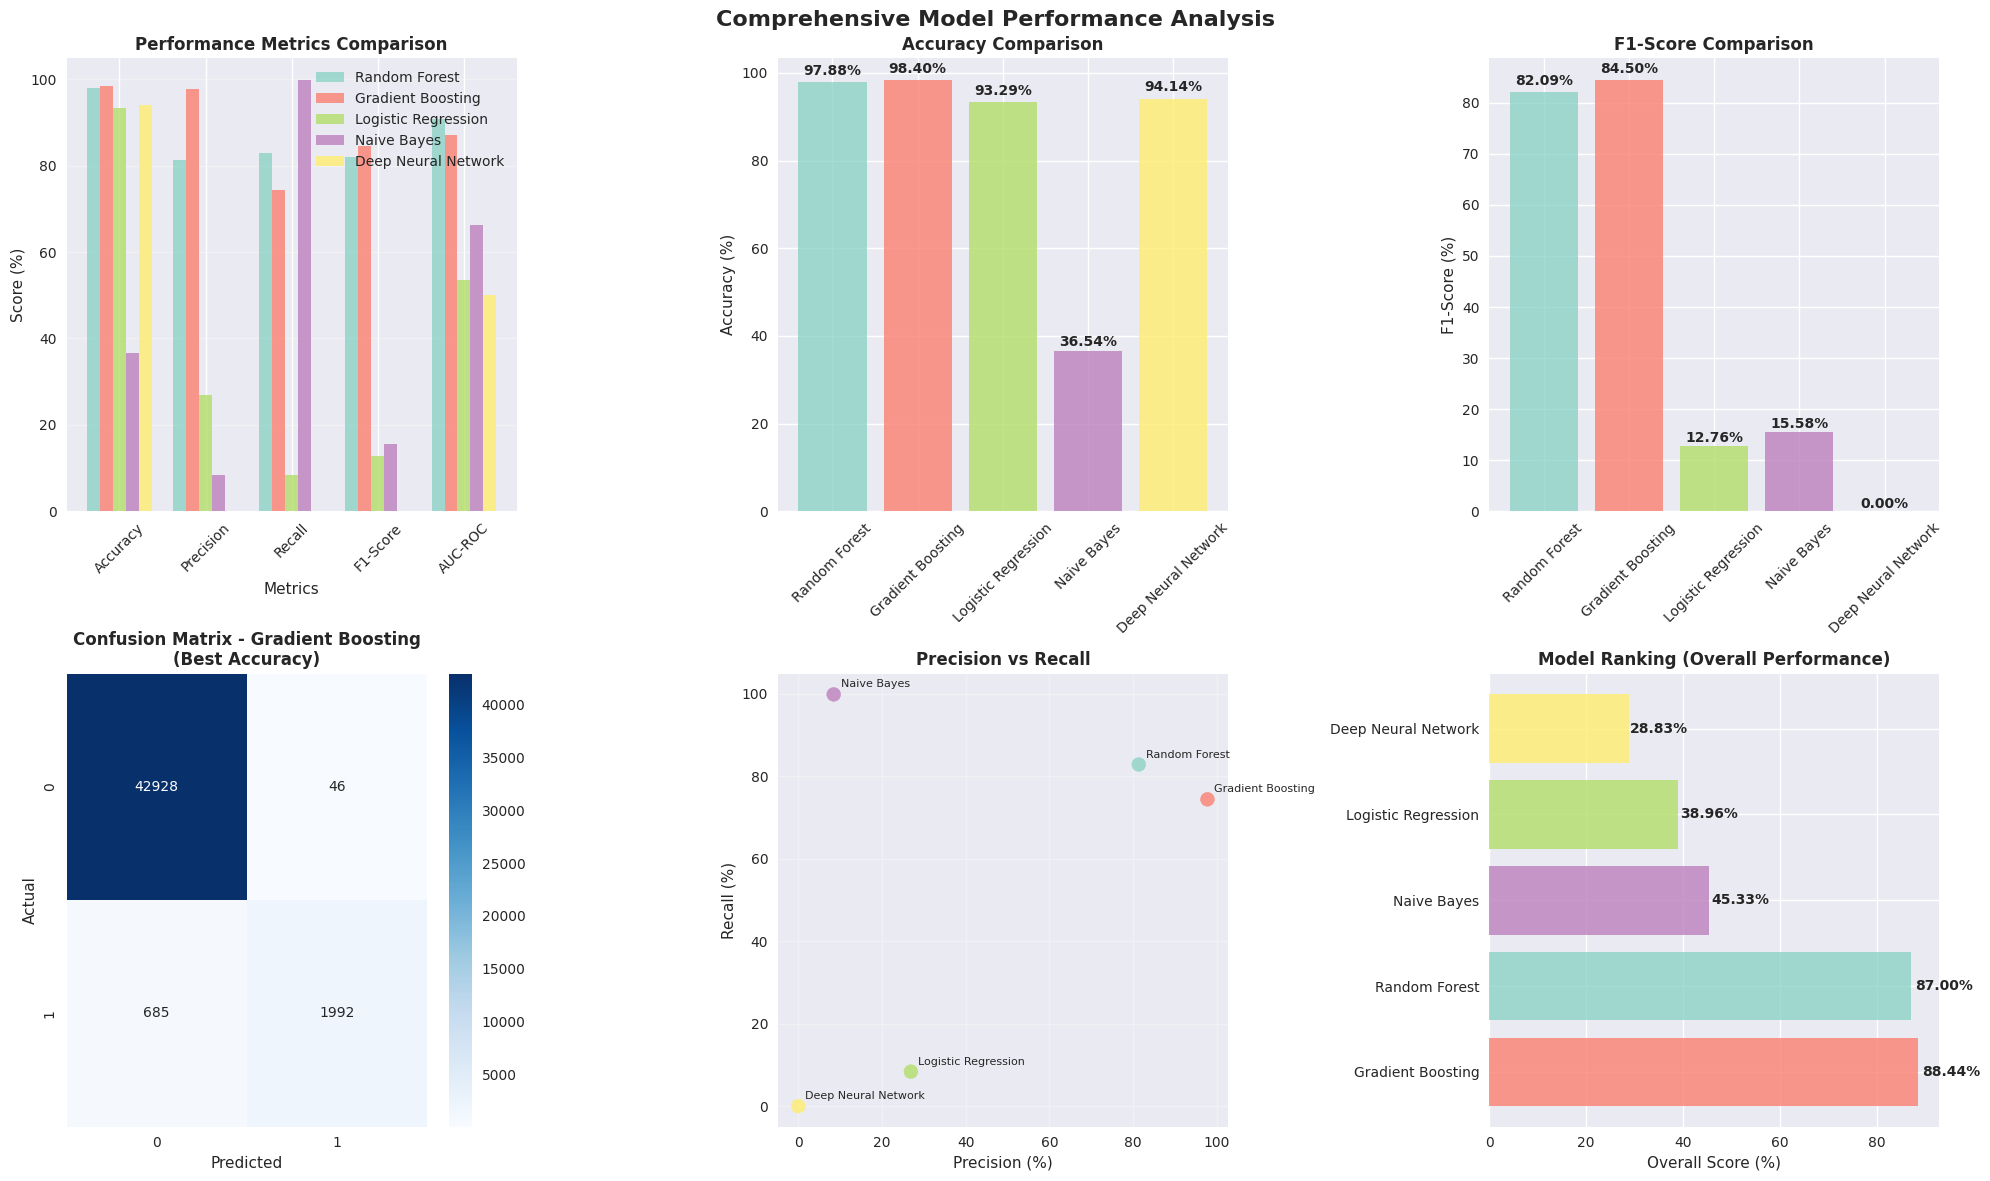


 STEP 10.1.2: MODEL RANKING SUMMARY:
--------------------------------------------------
 1. Gradient Boosting: 88.44%
 2. Random Forest: 87.00%
 3. Naive Bayes: 45.33%
 4. Logistic Regression: 38.96%
 5. Deep Neural Network: 28.83%


In [12]:
# =============================================================================
# SECTION 10.1: COMPREHENSIVE METRICS VISUALIZATIONS
# =============================================================================

def create_comprehensive_visualizations_with_nn(metrics, predictions_dict, y_test):

    print("\nSTEP 10.1.1: COMPREHENSIVE VISUALIZATIONS")
    print("="*60)
    
    # Filter out None predictions
    valid_metrics = {k: v for k, v in metrics.items() if k in predictions_dict and predictions_dict[k] is not None}
    valid_predictions = {k: v for k, v in predictions_dict.items() if v is not None}
    
    # Enhanced metrics comparison visualization
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Comprehensive Model Performance Analysis', fontsize=16, fontweight='bold')
    
    # Prepare data for visualization
    models = list(valid_metrics.keys())
    metric_names = list(next(iter(valid_metrics.values())).keys())
    
    # Colors for each model (including neural network)
    colors = plt.cm.Set3(np.linspace(0, 1, len(models)))
    
    # Overall metrics comparison (bar plot)
    ax1 = axes[0, 0]
    x = np.arange(len(metric_names))
    width = 0.15
    
    for i, (model, color) in enumerate(zip(models, colors)):
        values = [valid_metrics[model][metric] * 100 for metric in metric_names]
        ax1.bar(x + i * width, values, width, label=model, color=color, alpha=0.8)
    
    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Score (%)')
    ax1.set_title('Performance Metrics Comparison', fontweight='bold')
    ax1.set_xticks(x + width * (len(models)-1) / 2)
    ax1.set_xticklabels(metric_names, rotation=45)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Accuracy comparison
    ax2 = axes[0, 1]
    accuracies = [valid_metrics[model]['Accuracy'] * 100 for model in models]
    bars = ax2.bar(models, accuracies, color=colors, alpha=0.8)
    ax2.set_title('Accuracy Comparison', fontweight='bold')
    ax2.set_ylabel('Accuracy (%)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold')
    
    # F1-Score comparison
    ax3 = axes[0, 2]
    f1_scores = [valid_metrics[model]['F1-Score'] * 100 for model in models]
    bars = ax3.bar(models, f1_scores, color=colors, alpha=0.8)
    ax3.set_title('F1-Score Comparison', fontweight='bold')
    ax3.set_ylabel('F1-Score (%)')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, f1 in zip(bars, f1_scores):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{f1:.2f}%', ha='center', va='bottom', fontweight='bold')
    
    # Confusion matrix for best performing model
    best_model = max(models, key=lambda x: valid_metrics[x]['Accuracy'])
    ax4 = axes[1, 0]
    cm = confusion_matrix(y_test, valid_predictions[best_model])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
    ax4.set_title(f'Confusion Matrix - {best_model}\n(Best Accuracy)', fontweight='bold')
    ax4.set_xlabel('Predicted')
    ax4.set_ylabel('Actual')
    
    # Precision vs Recall scatter plot
    ax5 = axes[1, 1]
    precisions = [valid_metrics[model]['Precision'] * 100 for model in models]
    recalls = [valid_metrics[model]['Recall'] * 100 for model in models]
    
    scatter = ax5.scatter(precisions, recalls, c=colors, s=100, alpha=0.8)
    ax5.set_xlabel('Precision (%)')
    ax5.set_ylabel('Recall (%)')
    ax5.set_title('Precision vs Recall', fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # Add model labels
    for i, model in enumerate(models):
        ax5.annotate(model, (precisions[i], recalls[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # Model ranking
    ax6 = axes[1, 2]
    # Calculate overall score as average of all metrics
    overall_scores = []
    for model in models:
        avg_score = np.mean([valid_metrics[model][metric] for metric in metric_names]) * 100
        overall_scores.append(avg_score)
    
    # Sort models by overall score
    model_scores = list(zip(models, overall_scores))
    model_scores.sort(key=lambda x: x[1], reverse=True)
    sorted_models, sorted_scores = zip(*model_scores)
    
    bars = ax6.barh(range(len(sorted_models)), sorted_scores, 
                   color=[colors[models.index(model)] for model in sorted_models], alpha=0.8)
    ax6.set_yticks(range(len(sorted_models)))
    ax6.set_yticklabels(sorted_models)
    ax6.set_xlabel('Overall Score (%)')
    ax6.set_title('Model Ranking (Overall Performance)', fontweight='bold')
    
    # Add score labels
    for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
        width = bar.get_width()
        ax6.text(width + width*0.01, bar.get_y() + bar.get_height()/2.,
                f'{score:.2f}%', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
        
    # Print ranking summary
    print(f"\n STEP 10.1.2: MODEL RANKING SUMMARY:")
    print("-" * 50)
    for i, (model, score) in enumerate(model_scores, 1):
        print(f" {i}. {model}: {score:.2f}%")

# ==========================================================
# EXECUTION
# ==========================================================

# Create comprehensive visualizations including Neural Network
create_comprehensive_visualizations_with_nn(metrics, predictions, y_test)


## Section 10.2 - Classification Reports

### Goal
- Detailed Classification Reports

In [13]:
# =============================================================================
# SECTION 10.2: CLASSIFICATION REPORT
# =============================================================================

def generate_detailed_classification_reports_with_nn(y_test, predictions_dict):

    print("\nSTEP 10.2.1: DETAILED CLASSIFICATION REPORTS")
    print("="*60)
    
    for model_name, y_pred in predictions_dict.items():
        if y_pred is not None:
            print(f"\nCLASSIFICATION REPORT - {model_name}")
            print("=" * (30 + len(model_name)))
            print(classification_report(y_test, y_pred))
            print("-" * 60)

# ==========================================================
# EXECUTION
# ==========================================================

# Generate detailed classification reports including Neural Network
generate_detailed_classification_reports_with_nn(y_test, predictions)



STEP 10.2.1: DETAILED CLASSIFICATION REPORTS

CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42974
           1       0.81      0.83      0.82      2677

    accuracy                           0.98     45651
   macro avg       0.90      0.91      0.90     45651
weighted avg       0.98      0.98      0.98     45651

------------------------------------------------------------

CLASSIFICATION REPORT - Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     42974
           1       0.98      0.74      0.84      2677

    accuracy                           0.98     45651
   macro avg       0.98      0.87      0.92     45651
weighted avg       0.98      0.98      0.98     45651

------------------------------------------------------------

CLASSIFICATION REPORT - Logistic Regression
              precision    recall  f1-score   suppo

## Section 10.3 - ROC-AUC Visualization

### Goal
- Comprehensive ROC-AUC overview


STEP 10.3.1: CALCULATING PERFORMANCE METRICS

Calculating metrics for Random Forest...
 Metrics calculated for Random Forest

Calculating metrics for Gradient Boosting...
 Metrics calculated for Gradient Boosting

Calculating metrics for Logistic Regression...
 Metrics calculated for Logistic Regression

Calculating metrics for Naive Bayes...
 Metrics calculated for Naive Bayes

Calculating metrics for Deep Neural Network...
 Metrics calculated for Deep Neural Network

STEP 10.3.2: PERFORMANCE METRICS RESULTS

Performance metrics for Random Forest:
Accuracy: 97.88%
Precision: 81.33%
Recall: 82.85%
F1-Score: 82.09%
AUC-ROC: 90.83%


Performance metrics for Gradient Boosting:
Accuracy: 98.40%
Precision: 97.74%
Recall: 74.41%
F1-Score: 84.50%
AUC-ROC: 87.15%


Performance metrics for Logistic Regression:
Accuracy: 93.29%
Precision: 26.89%
Recall: 8.37%
F1-Score: 12.76%
AUC-ROC: 53.48%


Performance metrics for Naive Bayes:
Accuracy: 36.54%
Precision: 8.45%
Recall: 99.85%
F1-Score: 15.58%

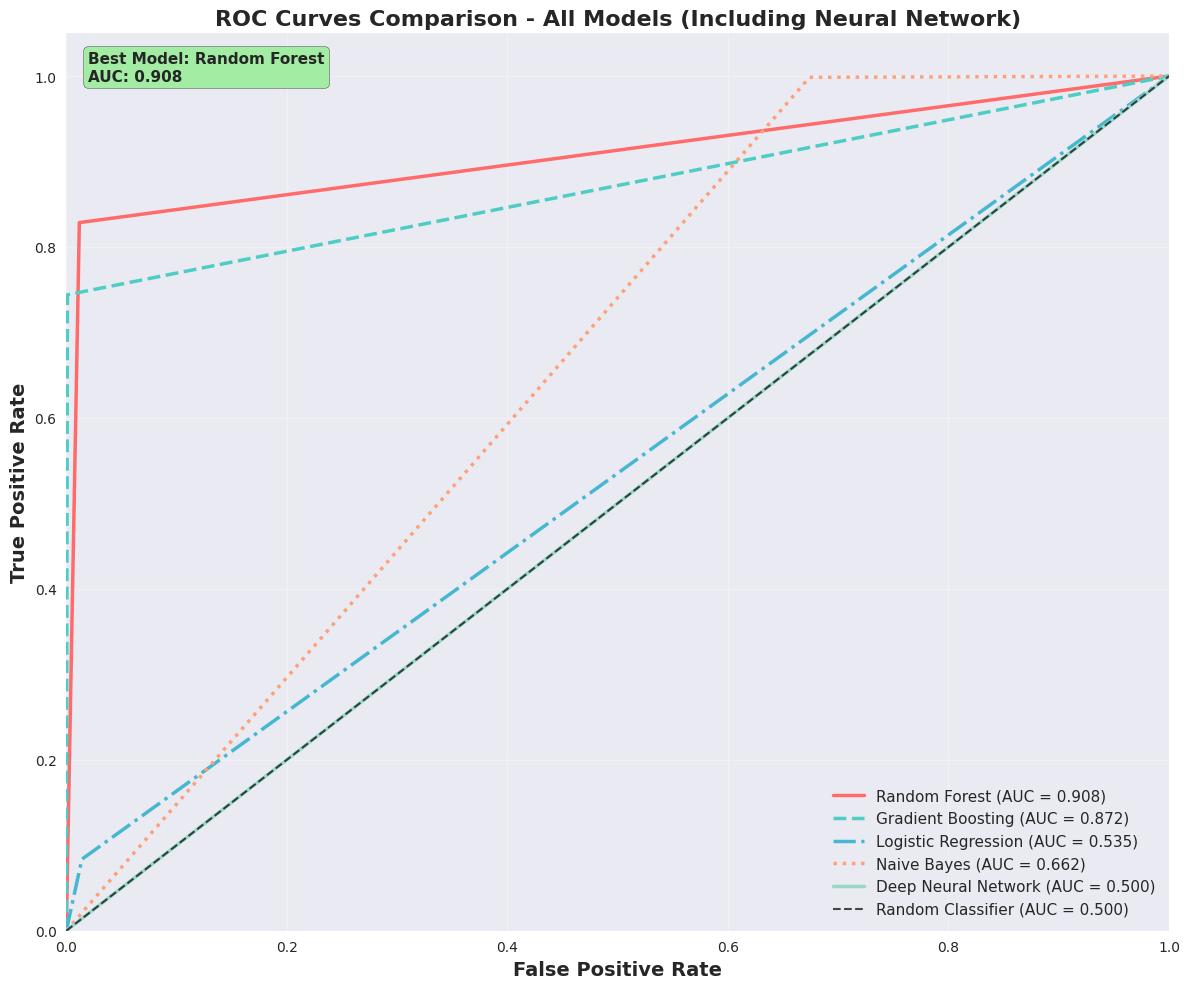


STEP 10.3.4: ROC AUC SUMMARY FROM METRICS:
-----------------------------------
 1.  Random Forest: 0.908
 2.  Gradient Boosting: 0.872
 3.  Naive Bayes: 0.662
 4.  Logistic Regression: 0.535
 5.  Deep Neural Network: 0.500


In [14]:
# =============================================================================
# SECTION 10.3: ROC VISUALIZATION
# =============================================================================

def calculate_all_metrics_with_nn(y_true, predictions_dict):

    print("\nSTEP 10.3.1: CALCULATING PERFORMANCE METRICS")
    print("="*60)
    
    metrics = {}
    
    for model_name, y_pred in predictions_dict.items():
        if y_pred is not None:
            print(f"\nCalculating metrics for {model_name}...")
            
            model_metrics = {
                "Accuracy": accuracy_score(y_true, y_pred),
                "Precision": precision_score(y_true, y_pred),
                "Recall": recall_score(y_true, y_pred),
                "F1-Score": f1_score(y_true, y_pred),
                "AUC-ROC": roc_auc_score(y_true, y_pred)
            }
            
            metrics[model_name] = model_metrics
            print(f" Metrics calculated for {model_name}")
    
    return metrics

def plot_roc_curves_from_metrics(metrics, y_true, predictions_dict):

    
    print("STEP 10.3.3: CREATING ROC CURVES VISUALIZATION FROM METRICS")
    print("="*50)
    
    # Set up the plot
    plt.figure(figsize=(12, 10))
    
    # Colors and line styles for each model
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#DDA0DD']
    linestyles = ['-', '--', '-.', ':', '-', '--']
    
    model_count = 0
    
    # Plot ROC curve for each model using binary predictions
    for model_name in metrics.keys():
        if model_name in predictions_dict and predictions_dict[model_name] is not None:
            print(f"Plotting ROC curve for {model_name}...")
            
            y_pred = predictions_dict[model_name]
            auc_score = metrics[model_name]["AUC-ROC"]
            
            # Calculate ROC curve using binary predictions
            fpr, tpr, _ = roc_curve(y_true, y_pred)
            
            # Plot ROC curve
            plt.plot(fpr, tpr, 
                    color=colors[model_count % len(colors)], 
                    linestyle=linestyles[model_count % len(linestyles)],
                    linewidth=2.5,
                    label=f'{model_name} (AUC = {auc_score:.3f})')
            
            print(f"   ROC curve plotted (AUC: {auc_score:.3f})")
            model_count += 1
    
    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.7, 
             label='Random Classifier (AUC = 0.500)')
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title('ROC Curves Comparison - All Models (Including Neural Network)', 
              fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.3)
    
    # Add text box with best model info
    best_model = max(metrics.keys(), key=lambda x: metrics[x]["AUC-ROC"])
    best_auc = metrics[best_model]["AUC-ROC"]
    
    textstr = f'Best Model: {best_model}\nAUC: {best_auc:.3f}'
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.8)
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11,
             verticalalignment='top', bbox=props, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary using existing metrics
    print(f"\nSTEP 10.3.4: ROC AUC SUMMARY FROM METRICS:")
    print("-" * 35)
    
    # Sort models by AUC-ROC score
    sorted_models = sorted(metrics.items(), key=lambda x: x[1]["AUC-ROC"], reverse=True)
    
    for i, (model, model_metrics) in enumerate(sorted_models, 1):
        auc_score = model_metrics["AUC-ROC"]
        if "Neural Network" in model:
            print(f" {i}.  {model}: {auc_score:.3f}")
        else:
            print(f" {i}.  {model}: {auc_score:.3f}")


# ==========================================================
# EXECUTION
# ==========================================================
    
# Calculate metrics
metrics = calculate_all_metrics_with_nn(y_test, predictions)

# Display metrics
print("\nSTEP 10.3.2: PERFORMANCE METRICS RESULTS")
print("="*60)

for model, scores in metrics.items():
    print(f"\nPerformance metrics for {model}:")
    for metric, score in scores.items():
        print(f"{metric}: {score * 100:.2f}%")
    print()

# Create ROC curves visualization using existing metrics
plot_roc_curves_from_metrics(metrics, y_test, predictions)


# Section 11 - Feature Importance

## Goal
- Feature Importance for Random Forest
    - Reveals how each feature contributes to the accuracy of the model. Features that are ranked highly have a significant influence on the model's decision-making, improving its performance.


STEP 11: FEATURE IMPORTANCE ANALYSIS
TOP 10 MOST IMPORTANT FEATURES:
-----------------------------------
    1. originp: 0.193064
    2. flow_RST_flag_count: 0.072326
    3. fwd_data_pkts_tot: 0.068898
    4. fwd_last_window_size: 0.057926
    5. flow_pkts_payload.min: 0.045646
    6. fwd_pkts_payload.min: 0.039843
    7. bwd_pkts_payload.avg: 0.037927
    8. fwd_PSH_flag_count: 0.035570
    9. bwd_last_window_size: 0.028619
   10. fwd_subflow_bytes: 0.027075


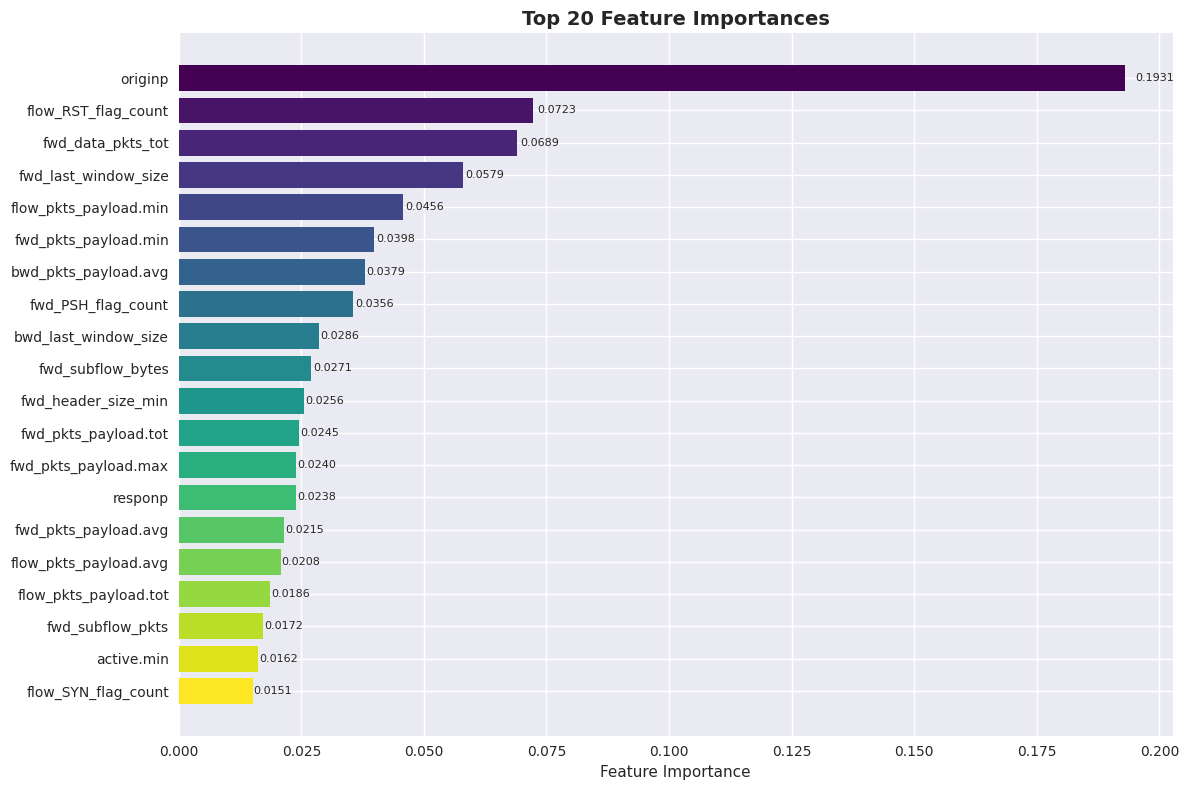

In [15]:
# =============================================================================
# SECTION 11: FEATURE IMPORTANCE
# =============================================================================

def create_feature_importance_visualization(rf_model, feature_names):

    print("\nSTEP 11: FEATURE IMPORTANCE ANALYSIS")
    print("="*50)
    
    # Get feature importances
    importances = rf_model.feature_importances_
    
    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("TOP 10 MOST IMPORTANT FEATURES:")
    print("-" * 35)
    for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
        print(f"   {i:2d}. {row['feature']}: {row['importance']:.6f}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    
    # Plot top 20 features
    top_features = feature_importance_df.head(20)
    
    plt.barh(range(len(top_features)), top_features['importance'], 
             color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, importance in enumerate(top_features['importance']):
        plt.text(importance + importance*0.01, i, f'{importance:.4f}', 
                va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
# ==========================================================
# EXECUTION
# ========================================================== 

# Create feature importance visualization
create_feature_importance_visualization(rf, feature_names)
